## BMI 6018 Term Project
### Members: Anwar Alsanea, Ryan Williams, and Md Imdadul Islam

## 1.0 Introduction:

Our term project involves dealing with daily gas produced and feed for [digesters](https://en.wikipedia.org/wiki/Anaerobic_digestion) in wastewater treatment plants (WWTP).
We have obtained data from a local WWTP [Central Valley Water Reclamation Facility CVWRF](https://www.cvwrf.org/).
![Anaerobic Digester](http://www.e-p.com/file/5dc89542-d2fd-45e6-ba17-1f02d1d36181)

The Central Valley Water Reclamation Facility maintains an anaerobic digestion program to produce methane gas from liquid waste. Methane gas is produced as microbes in the digester break down and feed on the organic material in the liquid waste. The methane gas is produced in trillions of cubic feet (tcf) and is used to power up to 70% of the facility on a given day. We contacted Phil Heck, the assistant plant manager, to see what kind of data the facility tracks on anaerobic digestion. The data we received had been dumped into an excel file, never to be seen or utilized. As a group, our goal was to easily export that data from excel into Python, create a Pandas Data Frame, and make the information more useful to the facility. We hope this resource might help the management team more easily track digester efficiency, model how the feed impacts the gas production, and provide a tool to determine where improvements and additions could be made to the system.


# Data:
Data will be imported into a dataframe from a csv file that contains gas produced in TCF (Trillion Cubic Feet) and total inputted feed in Gallons for month January - September (excluding August) for the year 2017.

In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import imdadplot as ip
from aclass import *
from anwarfunctions import *

Importing the data and renaming some columns:

In [29]:
DF = pd.read_csv('CVWRF.csv', header = 1, na_values="NaN")
DF.rename(columns={'Gas produced (TCF)': 'egg1_gasproduced', 'Feed (Gallons)': 'egg1_feed',
                  'Gas produced (TCF).1':'egg2_gasproduced','Feed (Gallons).1':'egg2_feed'}, inplace=True)


/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create two columns that will combine both egg digesters gas production and incoming feed:

In [31]:
DF['total_gas'] = DF['egg1_gasproduced'] + DF['egg2_gasproduced']
DF['total_feed'] = DF['egg1_feed'] + DF['egg2_feed']
DF=DF.query("egg1_gasproduced>0")
# to view the data:
DF.head(5)

,Month,Day,Year,egg1_gasproduced,egg1_feed,egg2_gasproduced,egg2_feed,total_gas,total_feed
0,January,1.0,2017.0,369044.0,73565.0,370885.0,73540.0,739929.0,147105.0
1,January,2.0,2017.0,366223.0,72840.0,367482.0,72830.0,733705.0,145670.0
2,January,3.0,2017.0,357710.0,74340.0,350032.0,73380.0,707742.0,147720.0
3,January,4.0,2017.0,376082.0,68850.0,377382.0,68845.0,753464.0,137695.0
4,January,5.0,2017.0,362110.0,66045.0,360277.0,66040.0,722387.0,132085.0


Creating smaller dataframes for each month:

In [7]:
DF_jan = DF[DF.Month == 'January']
DF_feb = DF[DF.Month == 'February']
DF_march = DF[DF.Month == 'March']
DF_april = DF[DF.Month == 'April']
DF_may = DF[DF.Month == 'May']
DF_june = DF[DF.Month == 'June']
DF_july = DF[DF.Month == 'July']
# there is no August data
DF_sept = DF[DF.Month == 'September']
month_list = [DF_jan,DF_feb,DF_march,DF_april ,DF_may,DF_june,DF_sept]

# Class:
test the clean class dataframe on the yearly dataframe:

In [4]:
DD = CleanDf(DF)
DD.__repr__()

"The dataframe after cleaning has a of shape of (rows, columns)(242, 9) and column headers: ['Month', 'Day', 'Year', 'egg1_gasproduced', 'egg1_feed', 'egg2_gasproduced', 'egg2_feed', 'total_gas', 'total_feed']"

now test the other class which will produce the average and total of a specified column:

In [5]:
DDD = stats_data ('total_feed',DF)
DDD.__repr__()

'The average value of total_feed: 159087.48 and the total is: 38499170.00'

# Using class to create lists and dictionaries:

First, use class to create a list of averages and totals for incoming feed and gas psoduced in each month:

In [9]:
# list comprehension:
year_feed_stats = [stats_data('total_feed',month).__str__() for month in month_list]
year_gas_produced_stats = [stats_data('total_gas',month).__str__() for month in month_list]

/home/jovyan/work/CVEEN_ARI/aclass.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self.__df.dropna(inplace=True)


[[('avg', 148186.45161290321), ('sum', 4593780.0)],
 [('avg', 156571.60714285713), ('sum', 4384005.0)],
 [('avg', 171007.5806451613), ('sum', 5301235.0)],
 [('avg', 159426.16666666666), ('sum', 4782785.0)],
 [('avg', 156770.38709677418), ('sum', 4859882.0)],
 [('avg', 158715.76666666666), ('sum', 4761473.0)],
 [('avg', 153607.33333333334), ('sum', 4608220.0)]]

check what they look like:

In [10]:
year_feed_stats

[[('avg', 148186.45161290321), ('sum', 4593780.0)],
 [('avg', 156571.60714285713), ('sum', 4384005.0)],
 [('avg', 171007.5806451613), ('sum', 5301235.0)],
 [('avg', 159426.16666666666), ('sum', 4782785.0)],
 [('avg', 156770.38709677418), ('sum', 4859882.0)],
 [('avg', 158715.76666666666), ('sum', 4761473.0)],
 [('avg', 153607.33333333334), ('sum', 4608220.0)]]

We can make the dictionary that will contain month as keys and average and sum as values for each incoming feed and gas production:

In [12]:
# make_dictionary is a function that will create a dictionary from two lists:
monthly_feed = make_dictionary(month_list,year_feed_stats)
monthly_gas = make_dictionary(month_list,year_gas_produced_stats)

View both dictionaries:

In [13]:
monthly_feed

{'April': [('avg', 159426.16666666666), ('sum', 4782785.0)],
 'February': [('avg', 156571.60714285713), ('sum', 4384005.0)],
 'January': [('avg', 148186.45161290321), ('sum', 4593780.0)],
 'June': [('avg', 158715.76666666666), ('sum', 4761473.0)],
 'March': [('avg', 171007.5806451613), ('sum', 5301235.0)],
 'May': [('avg', 156770.38709677418), ('sum', 4859882.0)],
 'September': [('avg', 153607.33333333334), ('sum', 4608220.0)]}

In [14]:
monthly_gas 

{'April': [('avg', 777421.73333333328), ('sum', 23322652.0)],
 'February': [('avg', 768192.42857142852), ('sum', 21509388.0)],
 'January': [('avg', 740954.6451612903), ('sum', 22969594.0)],
 'June': [('avg', 781080.96666666667), ('sum', 23432429.0)],
 'March': [('avg', 801236.16129032255), ('sum', 24838321.0)],
 'May': [('avg', 800487.16129032255), ('sum', 24815102.0)],
 'September': [('avg', 744360.8666666667), ('sum', 22330826.0)]}

From our analysis of the data, the highest incoming feed and the highest gas production was in the month March.


## Data visulization:

First we will create seperate dataframes again:

In [15]:
DF_1 = DF[["egg1_gasproduced","egg2_gasproduced"]]

The first plot is a histogram to compare the gas prodcution in the two egg digesters:

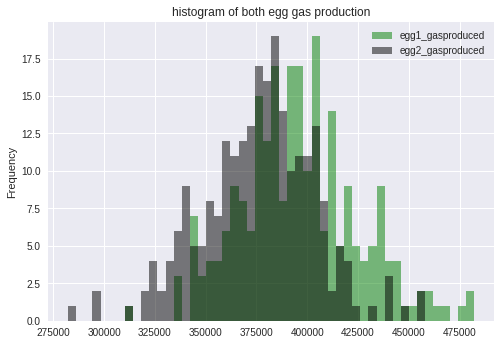

In [18]:
DF_1.plot(kind="hist", bins=50, color = ['green','black'], \
          alpha=0.5, title="histogram of both egg gas production")

This second plot is a bar plot that shows the median value as well as first and third quartile values to compare egg digesters 1 and 2. 

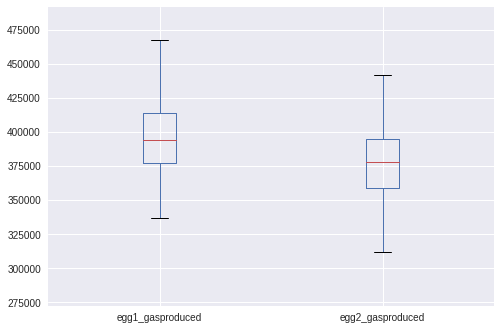

In [17]:
DF_1.plot(kind="box")

Now we are going to use the class stats_data from the module called aclass to verify the above findings. The normalized gas production (i.e. gas produced divided by the amount of feed) value was 4.9 for egg1 and 4.7 for egg2, which proves that digester 1 is more efficient.

In [19]:
egg1_feed = stats_data ('egg1_feed',DF)
egg1_gas = stats_data ('egg1_gasproduced',DF)
egg2_feed = stats_data ('egg2_feed',DF)
egg2_gas = stats_data ('egg2_gasproduced',DF)
normalized_egg1_gasproduction = egg1_gas.__str__()[0][1] / egg1_feed.__str__()[0][1] 
normalized_egg2_gasproduction = egg2_gas.__str__()[0][1] / egg2_feed.__str__()[0][1] 
# egg 1 is the better one!

Next we created a scatter plot using DataFrame.plot() function and kind = 'scatter', but our scatter plot looked so dense. That is why we decided to use hexabin plot. Hexabin plot was created using DataFrame.plot() function and kind = 'hexbin'.

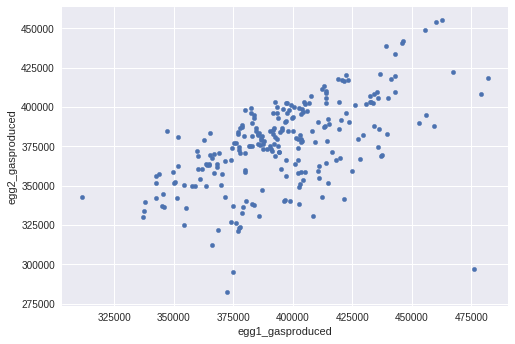

In [20]:
DF_1.plot(kind='scatter',x='egg1_gasproduced',y='egg2_gasproduced')

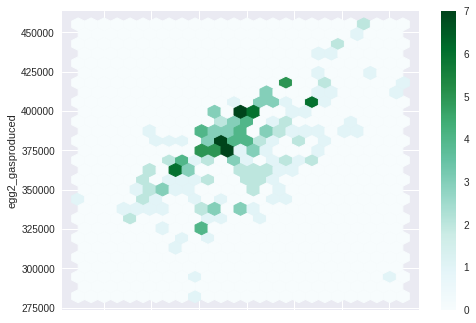

In [21]:
DF_1.plot(kind='hexbin',
                    x='egg1_gasproduced',
                    y='egg2_gasproduced',
                   gridsize=25)

In the next plot we have two scatter plot of gas production vs feed for both of the digester. This graph was created using DataFrame.plot.scatter(). The graph showed that both the digester produces maximum gas when the feed is about 100,000 gallons.

Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


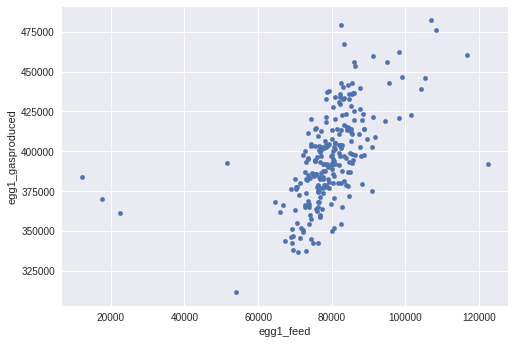

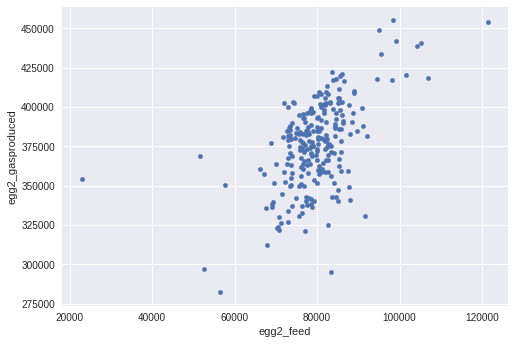

In [23]:
print(DF.plot.scatter(x="egg1_feed",y="egg1_gasproduced"))
print(DF.plot.scatter(x="egg2_feed",y="egg2_gasproduced"))

In [24]:
importlib.reload(ip)

<module 'imdadplot' from '/home/jovyan/work/CVEEN_ARI/imdadplot.py'>

The plot next is an interactive plot created using the function called daily_variation_by_month which is under the module named imdadplot.py. The function goes into another function called interact imported from ipwidget. Function daily_variation_by_month takes two keyword arguments: df_glob and month. In this plot we can choose the month that we want to visualize and the graph shows the daily variation of gas produced in egg1.

In [25]:
interact(ip.daily_variation_by_month, df_glob=fixed(DF), \
    month=["January","February","March","April","May","June","July","September"])

A Jupyter Widget

<function imdadplot.daily_variation_by_month>

Finally we created another interactive plot using the function monthly_boxplot_by_egg from the same previous module imdaplot.py. This also takes help of interact function. The function monthly_boxplot_by_egg function takes two keyword argument: df_glob and egg. In this plot we can choose the number of egg from the widget and the graph shows boxplot of gas production in different month. 

In [26]:
DF_egg1=DF[["Month","Day","Year","egg1_gasproduced","egg1_feed","total_gas","total_feed"]]
DF_egg2=DF[["Month","Day","Year","egg2_gasproduced","egg2_feed","total_gas","total_feed"]]
DF_egg1.rename(columns={'egg1_gasproduced': 'gas', 'egg1_feed': 'feed'}, inplace=True)
DF_egg2.rename(columns={'egg2_gasproduced': 'gas', 'egg2_feed': 'feed'}, inplace=True)
DF3=DF_egg1.append(DF_egg2)
DF3['egg_number']=[1]*242 + [2]*242

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [27]:
interact(ip.monthly_boxplot_by_egg, df_glob=fixed(DF3), egg=["1","2"])

A Jupyter Widget

<function imdadplot.monthly_boxplot_by_egg>

# Thank you:
This concludes our analysis for the digester data obtained from CVWRF